In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df.dtypes


Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Purchase      object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [2]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Gender'] = df['Gender'].astype('category')
df['Personalized_Recommendation_Purchase'] = df['Personalized_Recommendation_Purchase'].astype('category')
df['Review_Left'] = df['Review_Left'].astype('category')
df['Review_Helpfulness'] = df['Review_Helpfulness'].astype('category')
df['Review_Reliability'] = df['Review_Reliability'].astype('category')
df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].astype('category')
df['Add_to_Cart_Browsing'] = df['Add_to_Cart_Browsing'].astype('category')
df['Cart_Completion_Frequency'] = df['Cart_Completion_Frequency'].astype('category')
df['Purchase_Categories'] = df['Purchase_Categories'].astype('category')
df['Purchase_Frequency'] = df['Purchase_Frequency'].astype('category')
df['Browsing_Frequency'] = df['Browsing_Frequency'].astype('category')
df['Product_Search_Method'] = df['Product_Search_Method'].astype('category')
df['Search_Result_Exploration'] = df['Search_Result_Exploration'].astype('category')
df['Saveforlater_Frequency'] = df['Saveforlater_Frequency'].astype('category')

/var/folders/4f/3q1szy9x24sd8n7f5l6xxwp80000gn/T/ipykernel_26155/3258632168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [79]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
display(missing_report[missing_report['Missing Values'] > 0])

,Missing Values,Percentage (%)
age_group,5,1.207729


In [ ]:
custom_missing = ["Nothing", ".", "Nil"]
df.replace(custom_missing, pd.NA, inplace=True)

In [5]:
print(df.describe())

for col in df.select_dtypes(['category']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))


              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

Yulduz Contribution


Outliers in age:
Number of outliers: 20
Percentage of outliers: 3.32%
Boundary range: 3.50 to 55.50
Outlier values: [np.int64(3), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(57), np.int64(57), np.int64(58), np.int64(60), np.int64(60), np.int64(60), np.int64(62), np.int64(63), np.int64(64), np.int64(67), np.int64(67)]


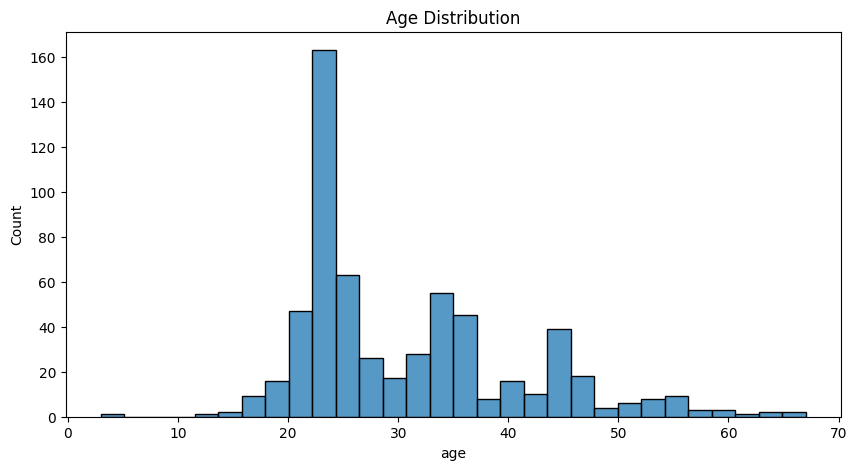


Age group distribution:
age_group
Under 18     20
18-30       325
31-50       228
51-70        29
Over 70       0
Name: count, dtype: int64

Suspicious ages (under 16):
age
3     1
12    1
15    2
Name: count, dtype: int64


In [6]:
#Yulduz Muradova
#age numerical data 
numerical_cols = ['age']

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

#  detailed outlier information
for column in numerical_cols:
    outliers, lower, upper = detect_outliers(df, column)
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")
    print(f"Boundary range: {lower:.2f} to {upper:.2f}")
    if len(outliers) > 0:
        print("Outlier values:", sorted(outliers.values))

# Additional visualization for age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution')
plt.show()

# Age groups analysis
age_bins = [0, 18, 30, 50, 70, 100]
age_labels = ['Under 18', '18-30', '31-50', '51-70', 'Over 70']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
print("\nAge group distribution:")
print(df['age_group'].value_counts().sort_index())

# Suspicious ages analysis
suspicious_ages = df[df['age'] < 16]
print("\nSuspicious ages (under 16):")
if len(suspicious_ages) > 0:
    print(suspicious_ages['age'].value_counts().sort_index())
else:
    print("No suspicious ages found under 16")

Cleaned outliers for age 

In [7]:
#Yulduz Muradova
df_cleaned = df.copy()

# Remove suspicious ages (under 16)
df_cleaned = df_cleaned[df_cleaned['age'] >= 16]

# Verify the cleaning
print("Original dataset size:", len(df))
print("Cleaned dataset size:", len(df_cleaned))
print("Number of records removed:", len(df) - len(df_cleaned))

print("\nNew age statistics:")
print(df_cleaned['age'].describe())

# New age group distribution with corrected labels
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], 
                                bins=[16, 18, 30, 50, 70, 100],
                                labels=['16-18', '18-30', '31-50', '51-70', 'Over 70'])
print("\nNew age group distribution:")
print(df_cleaned['age_group'].value_counts().sort_index())

# Check for outliers in the cleaned dataset
outliers, lower, upper = detect_outliers(df_cleaned, 'age')
print("\nOutliers in cleaned age data:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df_cleaned) * 100):.2f}%")
print(f"Boundary range: {lower:.2f} to {upper:.2f}")
if len(outliers) > 0:
    print("Outlier values:", sorted(outliers.values))
df = df_cleaned.copy()

Original dataset size: 602
Cleaned dataset size: 598
Number of records removed: 4

New age statistics:
count    598.000000
mean      30.921405
std       10.092645
min       16.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       67.000000
Name: age, dtype: float64

New age group distribution:
age_group
16-18       11
18-30      325
31-50      228
51-70       29
Over 70      0
Name: count, dtype: int64

Outliers in cleaned age data:
Number of outliers: 19
Percentage of outliers: 3.18%
Boundary range: 3.50 to 55.50
Outlier values: [np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(57), np.int64(57), np.int64(58), np.int64(60), np.int64(60), np.int64(60), np.int64(62), np.int64(63), np.int64(64), np.int64(67), np.int64(67)]


In [8]:
#Yulduz Muradova
# copy of the cleaned dataframe
df_no_outliers = df_cleaned.copy()
df_final = df_no_outliers.copy()
df_final = df_final[
    (df_final['age'] >= 5.00) & 
    (df_final['age'] <= 53.00)
]

# final final cleaning
print("Dataset size before removing final outliers:", len(df_no_outliers))
print("Final dataset size:", len(df_final))
print("Number of final outliers removed:", len(df_no_outliers) - len(df_final))

# Check the final age statistics
print("\nFinal age statistics after removing all outliers:")
print(df_final['age'].describe())

# Check the final age group distribution
df_final['age_group'] = pd.cut(df_final['age'],
                              bins=[16, 18, 30, 50, 70, 100],
                              labels=['16-18', '18-30', '31-50', '51-70', 'Over 70'])
print("\nFinal age group distribution:")
print(df_final['age_group'].value_counts().sort_index())

# Final verification for outliers
outliers, lower, upper = detect_outliers(df_final, 'age')
print("\nFinal verification - outliers check:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df_final) * 100):.2f}%")
print(f"Boundary range: {lower:.2f} to {upper:.2f}")

# Save the final cleaned dataset
df = df_final.copy()

Dataset size before removing final outliers: 598
Final dataset size: 572
Number of final outliers removed: 26

Final age statistics after removing all outliers:
count    572.000000
mean      29.701049
std        8.456117
min       16.000000
25%       23.000000
50%       26.000000
75%       35.000000
max       53.000000
Name: age, dtype: float64

Final age group distribution:
age_group
16-18       11
18-30      325
31-50      228
51-70        3
Over 70      0
Name: count, dtype: int64

Final verification - outliers check:
Number of outliers: 0
Percentage of outliers: 0.00%
Boundary range: 5.00 to 53.00


In [9]:
# List all column names in the dataset
print(df_cleaned.columns)


Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Purchase',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'age_group'],
      dtype='object')


# Modeling

## Apply K means algorithm to find clusters of different types of customers

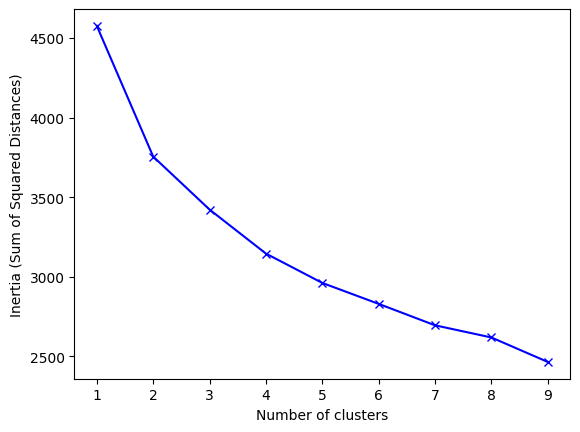

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Select numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaled_data = StandardScaler().fit_transform(df[numeric_cols])

# Elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Use scaled_data here
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


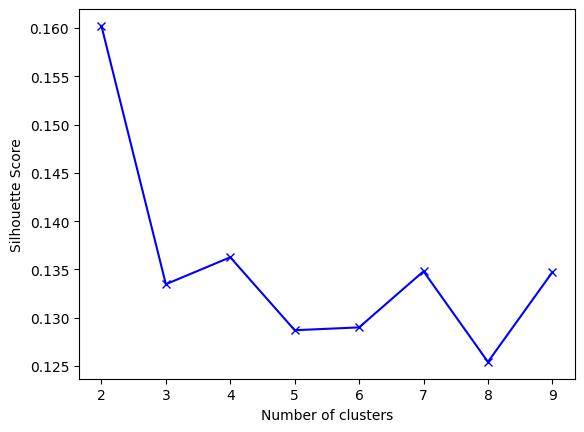

In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
K = range(2, 10)  # Silhouette score requires at least two clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg.append(silhouette_score(scaled_data, labels))

# Plot Silhouette Score
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

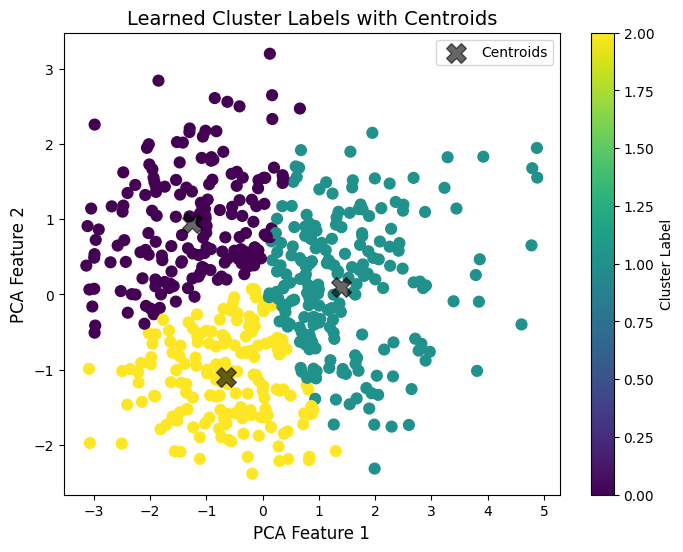

In [12]:
# Perform PCA first
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

# Apply KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Recalculate centroids in the PCA space
centroids_pca = kmeans.cluster_centers_

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data points with cluster labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=60, cmap='viridis')
ax.set_title('Learned Cluster Labels with Centroids', fontsize=14)
ax.set_xlabel('PCA Feature 1', fontsize=12)
ax.set_ylabel('PCA Feature 2', fontsize=12)
fig.colorbar(scatter, ax=ax, label='Cluster Label')

# Plot centroids
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
ax.legend()
plt.show()

In [13]:
# Create a DataFrame with the original data and cluster labels
original_clustered_df = df.copy()
original_clustered_df['Cluster'] = labels

# Print 10 samples for each cluster
for cluster in range(3):  # assuming 3 clusters
    print(f"\n--- Cluster {cluster} Samples ---")
    print(original_clustered_df[original_clustered_df['Cluster'] == cluster].sample(n=10, random_state=42))


--- Cluster 0 Samples ---
                    Timestamp  age             Gender      Purchase_Frequency  \
166 2023-06-06 19:20:35-05:30   24  Prefer not to say       Few times a month   
380 2023-06-08 17:48:55-05:30   34             Female   Multiple times a week   
434 2023-06-09 10:23:05-05:30   23             Female             Once a week   
120 2023-06-06 15:02:38-05:30   23             Female  Less than once a month   
500 2023-06-10 10:49:42-05:30   40               Male   Multiple times a week   
537 2023-06-11 23:06:16-05:30   32             Female       Few times a month   
185 2023-06-06 21:08:39-05:30   27               Male            Once a month   
397 2023-06-08 18:00:20-05:30   42             Female            Once a month   
306 2023-06-08 03:26:03-05:30   33             Female   Multiple times a week   
53  2023-06-05 10:53:16-05:30   21             Female       Few times a month   

                                   Purchase_Categories  \
166  Beauty and Persona

# Detailed Cluster Analysis
## 1. Demographic Composition
Cluster 1:

Age Balance: 50/50 split between 18-30 and 31-50 age groups
Gender Diversity: Predominantly Female, with some Male and "Prefer not to say"
Most diverse demographic profile

Cluster 2:

Age Skew: Heavily weighted towards 18-30 (80% of sample)
Gender: More varied gender representation
Younger, more diverse demographic

Cluster 3:

Age Concentration: Strongly 31-50 age group (90% of sample)
Gender: More Male-dominated
Mature, stable demographic

## 2. Purchase Behavior
Cluster 1:

Purchase Frequency: Most variable
Categories: Widest range (Beauty, Clothing, Groceries, Others)
Least predictable purchasing pattern

Cluster 2:

Purchase Frequency: Consistent "Few times a week"
Strong focus on Beauty and Personal Care
More intentional, planned purchasing

Cluster 3:

Purchase Frequency: Most conservative (Once a month to Few times a month)
Practical categories: Groceries, Home & Kitchen
Most budget-conscious cluster

## 3. Digital Interaction Patterns
Cluster 1:

Browsing: Mostly "Few times a month"
Search Methods: Most eclectic (categories, keywords mixed)
Exploration: Balanced between first page and multiple pages

Cluster 2:

Browsing: More frequent (Few times a week)
Search Methods: Most sophisticated (heavy filter use)
Exploration: Consistently multi-page browsers
Most digitally engaged cluster

Cluster 3:

Browsing: Moderate frequency
Search Methods: Most pragmatic
Exploration: Mix of first page and multiple pages
Most utilitarian digital interaction

## 4. Recommendation and Personalization
Cluster 1:

Personalized Recommendation Purchase: Mostly "Sometimes"
Moderate openness to personalization
Inconsistent recommendation response

Cluster 2:

Personalized Recommendation Purchase: More "Yes" responses
Highest recommendation frequency
Most receptive to personalized marketing

Cluster 3:

Personalized Recommendation Purchase: Mixed, leaning conservative
Least responsive to personalization
Most skeptical about recommendations

## 5. Review and Satisfaction Dynamics
Cluster 1:

Review Reliability: Most varied (Rarely to Heavily)
Review Helpfulness: Inconsistent
Shopping Satisfaction: Low (mostly 1-2)

Cluster 2:

Review Reliability: Consistently Moderate
Review Helpfulness: More positive
Shopping Satisfaction: Moderate (3-4)
Most balanced review interaction

Cluster 3:

Review Reliability: Lower (Rarely to Occasionally)
Review Helpfulness: Most conservative
Shopping Satisfaction: Lowest (1-2)
Most critical customer segment

## 6. Improvement and Service Appreciation
Cluster 1:

Service Appreciation: Consistently high (7-8)
Improvement Areas: Widely varied
More forgiving, constructive feedback

Cluster 2:

Service Appreciation: Lowest and most variable
Improvement Areas: Focused on specific aspects
Most vocal about potential improvements

Cluster 3:

Service Appreciation: Mixed
Improvement Areas: Practical, specific concerns
Most direct in feedback

 ## Cluster 1: The Casual, Mixed-Interest Shoppers 
Key Characteristics:

Age Range: Predominantly 18-30 and 31-50
Purchase Frequency: Varied (few times a month to multiple times a week)
Browsing Behavior:

Mostly browse few times a month
Mix of search methods (categories, keywords)
Tend to explore multiple pages or first page of search results


Shopping Preferences:

Diverse purchase categories (Beauty, Clothing, Groceries)
Moderate use of personalized recommendations
Mixed attitude towards add-to-cart behavior


Review Interaction:

Varied review reliability (from rarely to heavily)
Mixed review helpfulness


Satisfaction Levels:

Moderate shopping satisfaction (mostly 1-2 on a scale)
Moderate service appreciation



## Cluster 2: The Exploratory Shoppers
Key Characteristics:

Age Range: Primarily 18-30, some 31-50
Purchase Frequency: Moderate (few times a week to few times a month)
Browsing Behavior:

Consistent few times a week browsing
Diverse search methods (categories, filters, keywords)
Tend to explore multiple pages


Shopping Preferences:

Strong focus on Beauty and Personal Care
More likely to use personalized recommendations
More likely to add items to cart


Review Interaction:

Moderate to high review reliability
More positive about review helpfulness


Satisfaction Levels:

Slightly higher shopping satisfaction (3-4 range)
Lower service appreciation


Unique Trait: More open to personalized recommendations and exploring product options

## Cluster 3: The Occasional Shoppers
Key Characteristics:

Age Range: Predominantly 31-50
Purchase Frequency: Moderate (once a month to few times a month)
Browsing Behavior:

Consistent few times a week to few times a month browsing
Mix of search methods
Often explore multiple pages


Shopping Preferences:

Focused on Groceries, Beauty, and Home/Kitchen
Moderate use of personalized recommendations
More cautious about adding to cart


Review Interaction:

Lower review reliability (rarely to occasionally)
More conservative about review helpfulness


Satisfaction Levels:

Lower shopping satisfaction (mostly 1-2 range)
Mixed service appreciation

### Random Forest to determine which feature has the greatest importance on Purchase Frequency

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time

/opt/miniconda3/envs/telecom/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


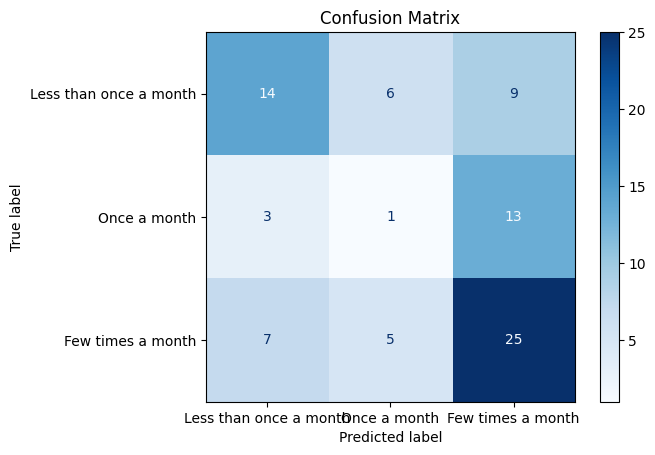

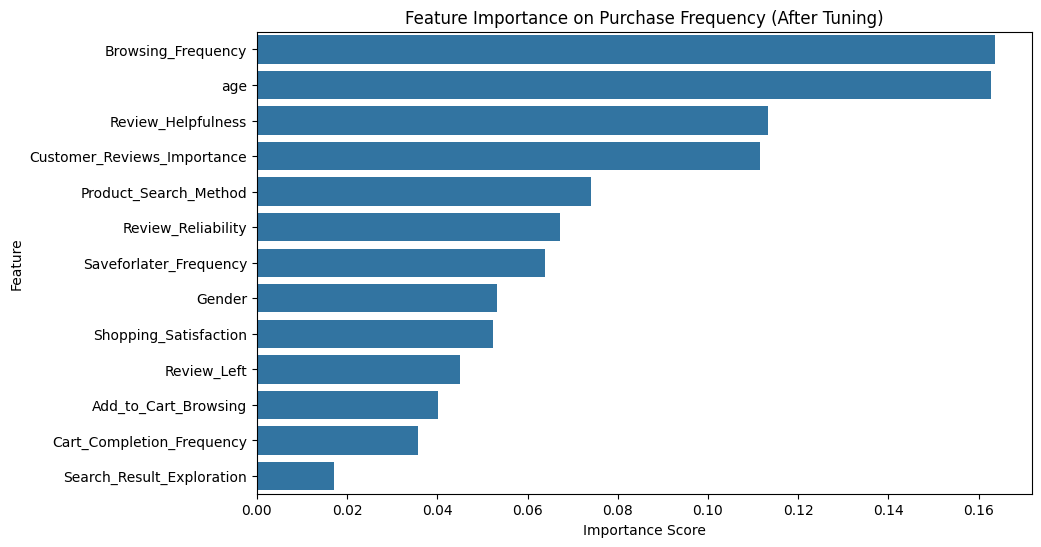

                        Feature  Importance
2            Browsing_Frequency    0.163631
1                           age    0.162772
11           Review_Helpfulness    0.113355
5   Customer_Reviews_Importance    0.111488
3         Product_Search_Method    0.074155
10           Review_Reliability    0.067088
8        Saveforlater_Frequency    0.063971
0                        Gender    0.053150
12        Shopping_Satisfaction    0.052257
9                   Review_Left    0.045020
6          Add_to_Cart_Browsing    0.040125
7     Cart_Completion_Frequency    0.035815
4     Search_Result_Exploration    0.017173


In [77]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map Purchase Frequency to numeric values
purchase_frequency_mapping = {
    "Few times a month": 2,
    "Once a month": 1,
    "Less than once a month": 0
}
df['Purchase_Frequency_Numeric'] = df['Purchase_Frequency'].map(purchase_frequency_mapping)

# Drop rows with missing target values
df = df.dropna(subset=['Purchase_Frequency_Numeric'])

# Define feature columns
features = [
    'Gender', 'age', 'Browsing_Frequency', 'Product_Search_Method',
    'Search_Result_Exploration', 'Customer_Reviews_Importance',
    'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 
    'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
    'Review_Helpfulness', 'Shopping_Satisfaction'
]

# Ensure categorical features are encoded
label_encoder = LabelEncoder()
for col in features:
    if df[col].dtype == 'object' or isinstance(df[col].iloc[0], str):  # Check for string dtype
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Define features (X) and target (y)
X = df[features]
y = df['Purchase_Frequency_Numeric']

# Ensure target variable is numeric
y = y.astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_report = classification_report(y_test, y_pred, target_names=[
    "Less than once a month", "Once a month", "Few times a month"
])
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    "Less than once a month", "Once a month", "Few times a month"
])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature importance from the best model
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance on Purchase Frequency (After Tuning)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display feature importance
print(feature_importances)


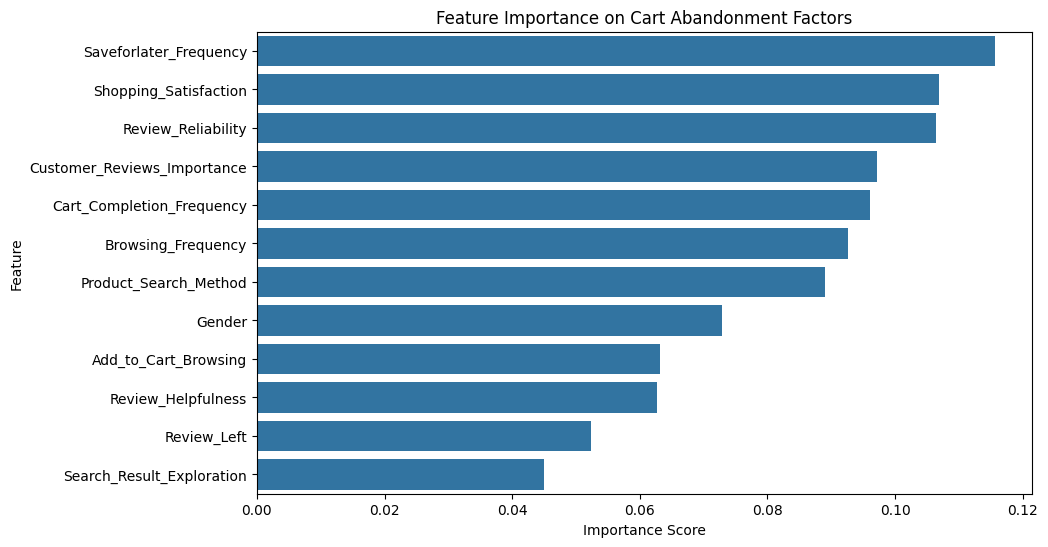

                        Feature  Importance
7        Saveforlater_Frequency    0.115664
11        Shopping_Satisfaction    0.106930
9            Review_Reliability    0.106392
4   Customer_Reviews_Importance    0.097194
6     Cart_Completion_Frequency    0.096037
1            Browsing_Frequency    0.092664
2         Product_Search_Method    0.089098
0                        Gender    0.072917
5          Add_to_Cart_Browsing    0.063108
10           Review_Helpfulness    0.062666
8                   Review_Left    0.052319
3     Search_Result_Exploration    0.045011


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define the new target variable
target_variable = 'Cart_Abandonment_Factors'

# Drop rows with missing target values
df = df.dropna(subset=[target_variable])

# Define feature columns
features = [
    'Gender', 'Browsing_Frequency', 'Product_Search_Method',
    'Search_Result_Exploration', 'Customer_Reviews_Importance',
    'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 
    'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
    'Review_Helpfulness', 'Shopping_Satisfaction'
]

# Encode categorical features
label_encoder = LabelEncoder()
for col in features:
    if df[col].dtype == 'object' or isinstance(df[col].iloc[0], str):  # Check for string dtype
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Ensure target is encoded
if df[target_variable].dtype == 'object' or isinstance(df[target_variable].iloc[0], str):
    df[target_variable] = label_encoder.fit_transform(df[target_variable].astype(str))

# Define features (X) and target (y)
X = df[features]
y = df[target_variable]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance on Cart Abandonment Factors')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display feature importance
print(feature_importances)
